In [32]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [8]:
# Define the command to run the executable
command = "C:/Users/tus88262/Documents/GitHub/antimalarial_pk_pd/build/Debug/run_ppq_pk.exe -lum"

In [10]:
output = subprocess.run(command, capture_output=True, text=True)

In [12]:
# Split the output into lines
lines = output.stdout.splitlines()

In [14]:
# Create a dataframe to store the C++ program code
df = pd.DataFrame([line.split(',') for line in lines], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df = df.iloc[1:]
df = df.apply(pd.to_numeric, errors='coerce')

In [16]:
# Write the dataframe to a CSV file
#df.to_csv(f'C:/Users/tus88262/Documents/GitHub/antimalarial_pk_pd/out.lum.20240530_{i}.csv', index=True)

Text(0.5, 1.0, 'Hour vs Comp2Conc')

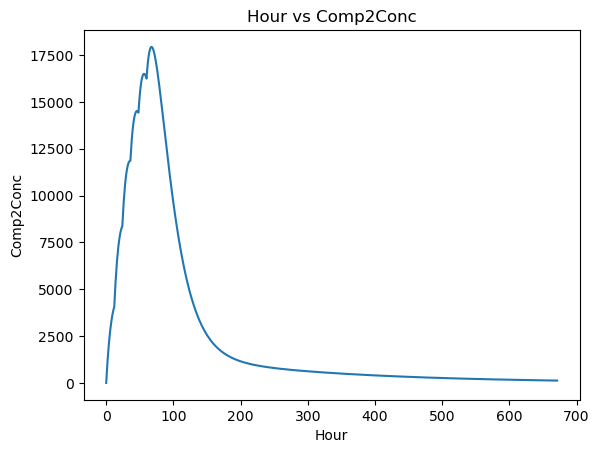

In [18]:
#Plotting Concentration as a function of Time
plt.plot(df['HOUR'],df['COMP2CONC'])
plt.xlabel('Hour')  # X-axis label
plt.ylabel('Comp2Conc')  # Y-axis label
plt.title('Hour vs Comp2Conc')  # Plot title

In [49]:
# Running model for 10 patients
command_10_patients = "C:/Users/tus88262/Documents/GitHub/antimalarial_pk_pd/build/Debug/run_ppq_pk.exe -lum -n 10"
output_10_patients = subprocess.run(command_10_patients, capture_output=True, text=True)
lines_10_patients = output_10_patients.stdout.splitlines()
df_10_patients = pd.DataFrame([line.split(',') for line in lines_10_patients], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df_10_patients = df_10_patients.iloc[1:]
df_10_patients = df_10_patients.apply(pd.to_numeric, errors='coerce')

In [256]:
df_10_patients.iloc[1956:2017]

,PID,HOUR,COMP2CONC,PARASITEDENSITY
1957,2,612.0,149.747,0.039
1958,2,613.0,149.100,0.039
1959,2,614.0,148.456,0.039
1960,2,615.0,147.814,0.039
1961,2,616.0,147.176,0.039
...,...,...,...,...
2013,2,668.0,117.499,0.039
2014,2,669.0,116.991,0.039
2015,2,670.0,116.486,0.039
2016,2,671.0,115.982,0.039


In [51]:
df_10_patients

,PID,HOUR,COMP2CONC,PARASITEDENSITY
1,0,0.0,0.000,1000.000
2,0,1.0,94.460,1000.000
3,0,2.0,184.341,999.999
4,0,3.0,269.827,999.651
5,0,4.0,351.096,983.997
...,...,...,...,...
6716,9,667.0,114.144,0.767
6717,9,668.0,113.649,0.767
6718,9,669.0,113.156,0.767
6719,9,670.0,112.666,0.767


C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


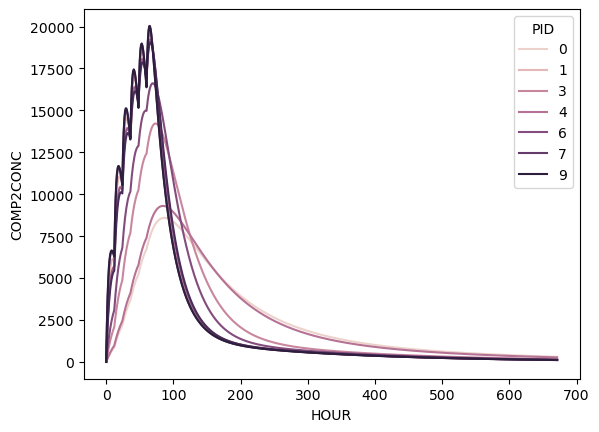

In [202]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='COMP2CONC', hue='PID', data=df_10_patients)
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


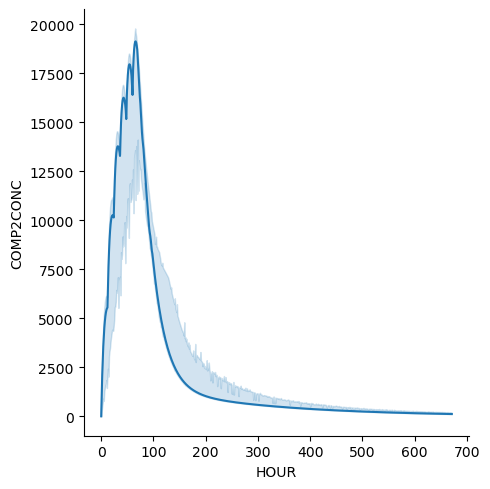

In [115]:
sns.relplot(x='HOUR', y='COMP2CONC', estimator='median', errorbar=('ci', 95), data=df_10_patients, kind="line")
plt.show()

In [64]:
df_10_patients_wide = df_10_patients.pivot(index="HOUR", columns="PID", values="COMP2CONC")
df_10_patients_wide

PID,0,1,2,3,4,5,6,7,8,9
HOUR,,,,,,,,,,
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1.0,94.460,1626.664,1244.286,250.495,107.355,1222.446,413.011,2108.862,1091.549,2206.745
2.0,184.341,2894.105,2267.336,484.451,209.350,2230.542,791.206,3637.530,2007.776,3782.041
3.0,269.827,3870.711,3102.084,702.701,306.204,3055.697,1136.815,4727.236,2771.917,4886.434
4.0,351.096,4612.194,3776.756,906.039,398.129,3724.898,1451.939,5485.433,3404.268,5640.312
...,...,...,...,...,...,...,...,...,...,...
667.0,309.352,115.910,118.009,160.637,272.695,118.170,137.829,114.373,119.278,114.144
668.0,308.133,115.408,117.499,159.968,271.612,117.659,137.244,113.877,118.763,113.649
669.0,306.919,114.908,116.991,159.302,270.534,117.151,136.662,113.383,118.251,113.156


In [214]:
df_10_patients_wide['PID==2']

KeyError: 'PID==2'

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


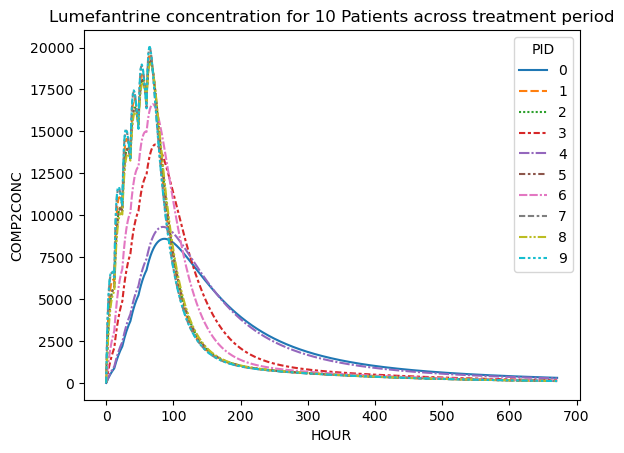

In [89]:
sns.lineplot(data=df_10_patients_wide).set(title='Lumefantrine concentration for 10 Patients across treatment period', ylabel='COMP2CONC')
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


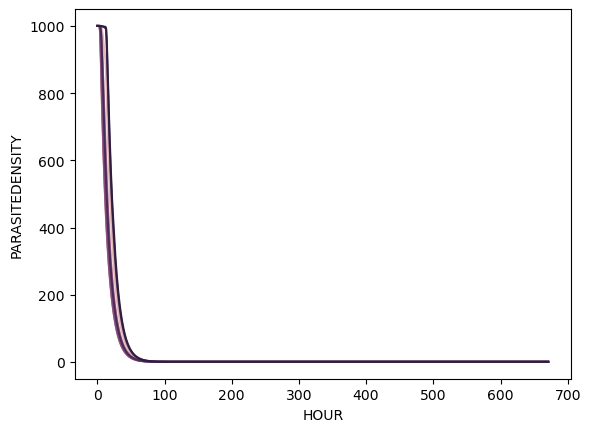

In [99]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_10_patients, legend=False)
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


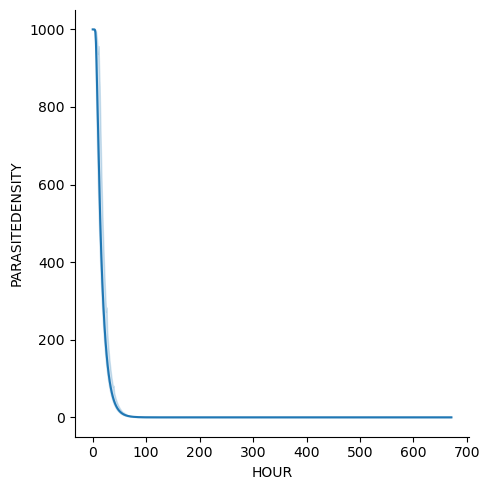

In [113]:
sns.relplot(x='HOUR', y='PARASITEDENSITY', estimator='median', errorbar=('ci', 95), data=df_10_patients,kind="line")
plt.show()

In [101]:
df_10_patients_wide_02 = df_10_patients.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")
df_10_patients_wide_02

PID,0,1,2,3,4,5,6,7,8,9
HOUR,,,,,,,,,,
0.0,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
1.0,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
2.0,999.999,1000.000,1000.000,999.999,999.999,1000.000,1000.000,1000.000,1000.000,1000.000
3.0,999.651,999.993,999.980,999.760,999.662,999.979,999.839,999.998,999.971,999.998
4.0,983.997,999.846,999.445,988.862,984.444,999.404,992.693,999.970,999.083,999.979
...,...,...,...,...,...,...,...,...,...,...
667.0,0.000,0.171,0.039,0.000,0.000,0.035,0.000,0.604,0.019,0.767
668.0,0.000,0.171,0.039,0.000,0.000,0.035,0.000,0.604,0.019,0.767
669.0,0.000,0.171,0.039,0.000,0.000,0.035,0.000,0.604,0.019,0.767


C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


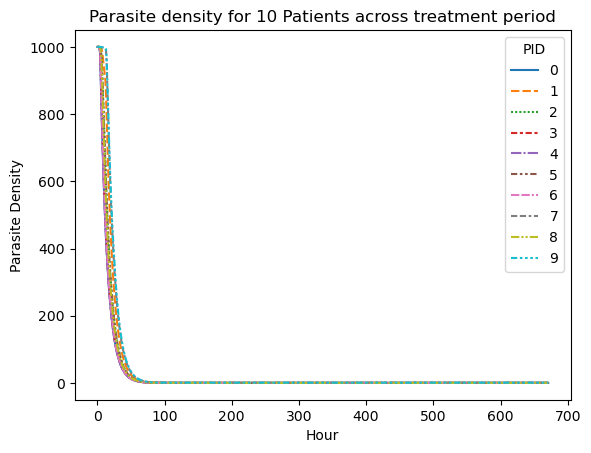

In [105]:
sns.lineplot(data=df_10_patients_wide_02).set(title='Parasite density for 10 Patients across treatment period', ylabel='Parasite Density',xlabel='Hour')
plt.show()

In [20]:
# Running model for 100 patients
command_100_patients = "C:/Users/tus88262/Documents/GitHub/antimalarial_pk_pd/build/Debug/run_ppq_pk.exe -lum -n 100"
output_100_patients = subprocess.run(command_100_patients, capture_output=True, text=True)
lines_100_patients = output_100_patients.stdout.splitlines()
df_100_patients = pd.DataFrame([line.split(',') for line in lines_100_patients], columns=["PID","HOUR","COMP2CONC","PARASITEDENSITY"])
df_100_patients = df_100_patients.iloc[1:]
df_100_patients = df_100_patients.apply(pd.to_numeric, errors='coerce')

In [22]:
df_100_patients

,PID,HOUR,COMP2CONC,PARASITEDENSITY
1,0,0.0,0.000,1000.000
2,0,1.0,1125.265,1000.000
3,0,2.0,2065.524,1000.000
4,0,3.0,2845.961,999.973
5,0,4.0,3488.483,999.179
...,...,...,...,...
67196,99,667.0,122.335,0.005
67197,99,668.0,121.809,0.005
67198,99,669.0,121.284,0.005
67199,99,670.0,120.762,0.005


Text(0.5, 1.0, 'Lumefantrine concentration for 100 Patients across treatment period')

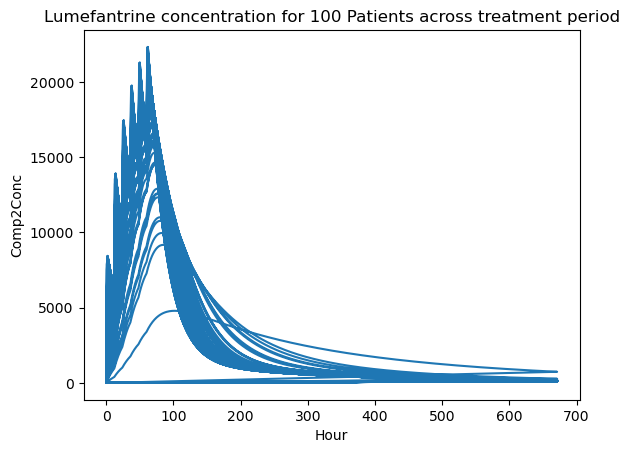

In [91]:
#Plotting Concentration as a function of Time for 100 patients
plt.plot(df_100_patients['HOUR'],df_100_patients['COMP2CONC'])
plt.xlabel('Hour')  # X-axis label
plt.ylabel('Comp2Conc')  # Y-axis label
plt.title('Lumefantrine concentration for 100 Patients across treatment period')  # Plot title

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


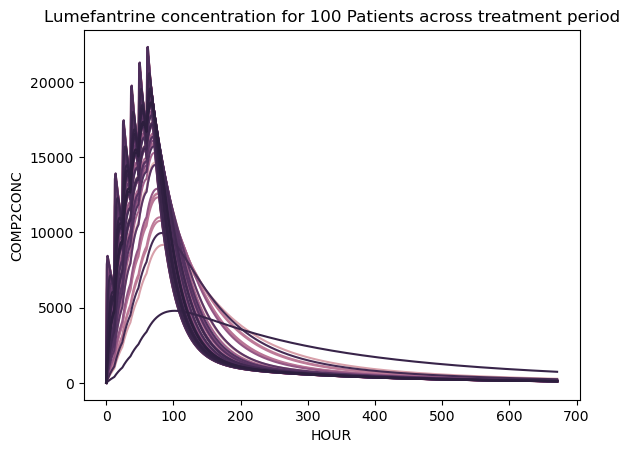

In [93]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='COMP2CONC', hue='PID', data=df_100_patients, legend=False).set_title('Lumefantrine concentration for 100 Patients across treatment period')
plt.show()

In [70]:
df_100_patients_wide = df_100_patients.pivot(index="HOUR", columns="PID", values="COMP2CONC")
df_100_patients_wide
#lumefantrine conc model is stochastic

PID,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1.0,1125.265,2472.177,1332.360,1089.374,351.847,1888.332,1725.427,4429.812,270.778,636.083,...,751.972,474.541,1214.164,3068.793,41.479,1172.675,1553.536,1325.109,792.842,846.334
2.0,2065.524,4163.040,2414.620,2004.042,676.453,3304.032,3050.640,6481.397,523.060,1202.589,...,1411.889,905.795,2216.563,4961.385,81.194,2146.296,2776.785,2402.560,1484.981,1580.078
3.0,2845.961,5294.238,3286.387,2767.117,975.416,4350.651,4056.158,7350.296,757.806,1705.456,...,1988.683,1296.780,3038.036,6089.624,119.213,2948.964,3729.988,3271.380,2086.610,2213.250
4.0,3488.483,6025.384,3981.219,3398.796,1250.250,5109.525,4806.691,7633.902,975.933,2150.157,...,2490.480,1650.325,3705.113,6722.475,155.601,3604.984,4462.711,3964.666,2606.958,2756.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,118.967,113.617,117.414,119.299,143.576,114.976,115.523,111.684,156.002,126.995,...,124.081,133.708,118.233,112.768,747.835,118.561,116.229,117.460,123.270,122.335
668.0,118.453,113.124,116.907,118.784,142.969,114.478,115.023,111.199,155.350,126.451,...,123.548,133.138,117.722,112.279,745.631,118.049,115.725,116.952,122.740,121.809
669.0,117.942,112.633,116.401,118.271,142.365,113.981,114.524,110.715,154.701,125.909,...,123.017,132.571,117.213,111.791,743.434,117.539,115.225,116.447,122.212,121.284


C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


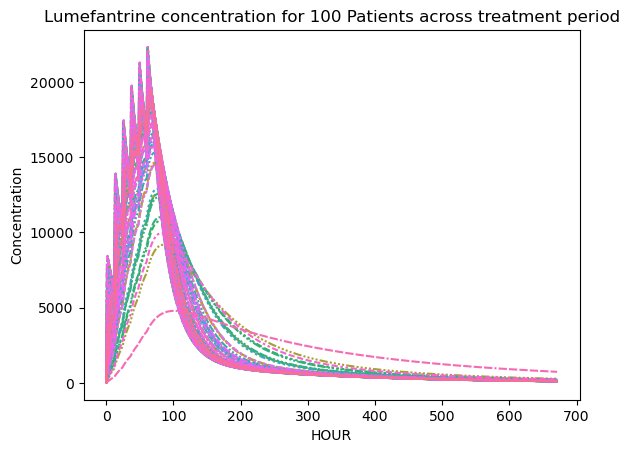

In [97]:
sns.lineplot(data=df_100_patients_wide,legend=False).set(title='Lumefantrine concentration for 100 Patients across treatment period',ylabel='Concentration')
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


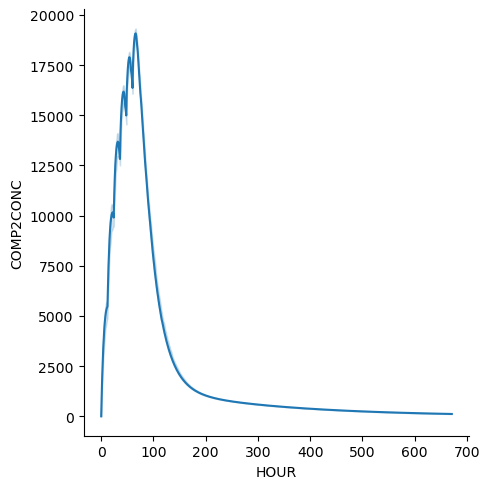

In [119]:
sns.relplot(x='HOUR', y='COMP2CONC', estimator='median', errorbar=('ci', 95), data=df_100_patients,kind="line")
plt.show()

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

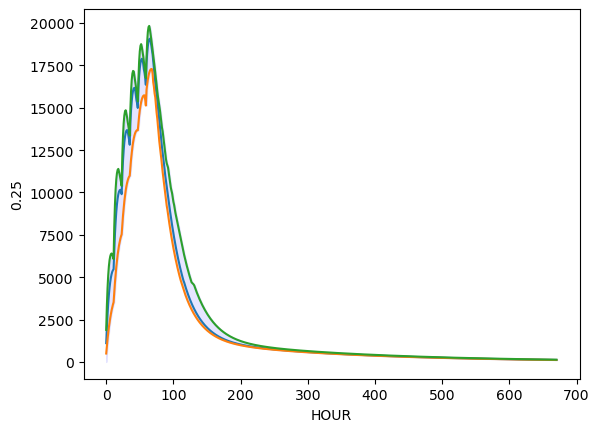

In [198]:
import numpy as np
import seaborn as sns

# Calculate the median, 25th percentile, and 75th percentile
median_comp2conc = df_100_patients_wide.median(axis=1)
perc_25_comp2conc = df_100_patients_wide.quantile(0.25,axis=1)
perc_75_comp2conc = df_100_patients_wide.quantile(0.75,axis=1)

plot = sns.lineplot(x=df_100_patients['HOUR'],y=median_comp2conc)
plot = sns.lineplot(x=df_100_patients['HOUR'],y=perc_25_comp2conc)
plot = sns.lineplot(x=df_100_patients['HOUR'],y=perc_75_comp2conc)

plt.fill_between(np.arange(672), perc_25_comp2conc, perc_75_comp2conc, color='blue', alpha=0.1)

#Shade area first and then plot lines (?)

Text(0.5, 1.0, 'Parasite Density as a function of Time for 100 Patients')

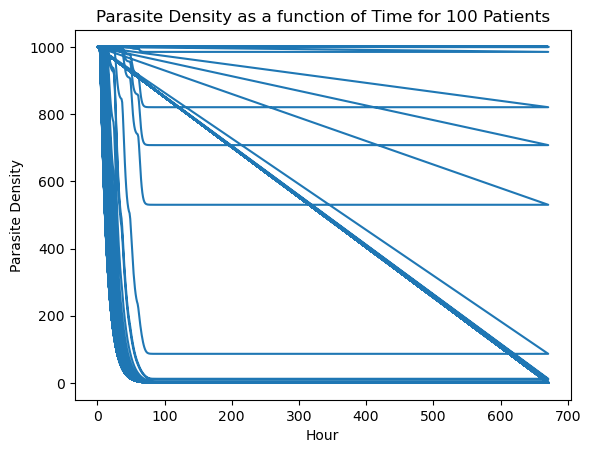

In [26]:
#Plotting Parasite Density as a function of Time for 100 patients
plt.plot(df_100_patients['HOUR'],df_100_patients['PARASITEDENSITY'])
plt.xlabel('Hour')  # X-axis label
plt.ylabel('Parasite Density')  # Y-axis label
plt.title('Parasite Density as a function of Time for 100 Patients')  # Plot title
#Fix it, group by PID

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


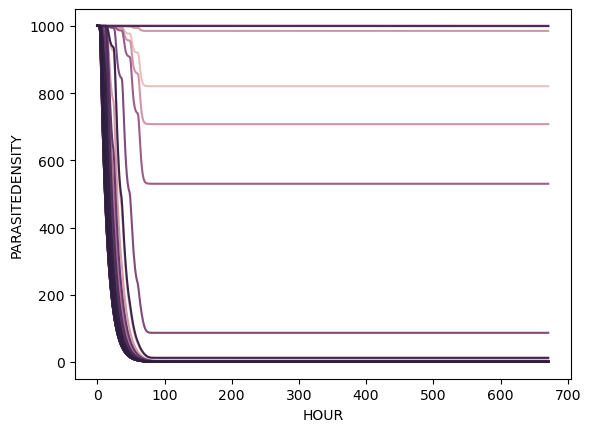

In [44]:
#Creating a spaghetti plot using seaborn
sns.lineplot(x='HOUR', y='PARASITEDENSITY', hue='PID', data=df_100_patients, legend=False)
plt.show()
#lum ng/ml or mg/mL

C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


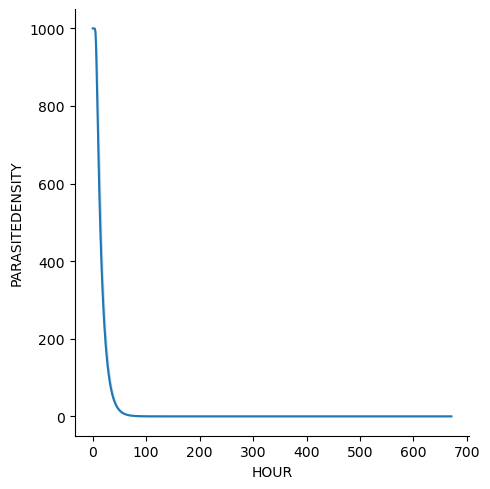

In [117]:
sns.relplot(x='HOUR', y='PARASITEDENSITY', estimator='median', errorbar=('ci', 95), data=df_100_patients,kind="line")
plt.show()

In [260]:
df_100_patients_wide_02 = df_100_patients.pivot(index="HOUR", columns="PID", values="PARASITEDENSITY")
df_100_patients_wide_02

PID,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
HOUR,,,,,,,,,,,,,,,,,,,,,
0.0,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,...,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
1.0,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,...,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
2.0,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,999.999,1000.000,...,1000.000,1000.000,1000.000,1000.000,999.999,1000.000,1000.000,1000.000,1000.000,1000.000
3.0,999.973,999.999,999.984,999.970,999.813,999.996,999.994,1000.000,999.772,999.907,...,999.931,999.861,999.979,1000.000,999.604,999.976,999.991,999.984,999.937,999.945
4.0,999.179,999.991,999.586,999.076,991.395,999.937,999.890,1000.000,989.408,996.141,...,997.288,993.834,999.387,999.999,982.083,999.297,999.803,999.576,997.611,997.980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667.0,0.023,1.624,0.057,0.019,0.000,0.356,0.231,820.573,0.000,0.001,...,0.002,0.000,0.034,12.284,0.000,0.028,0.134,0.055,0.003,0.005
668.0,0.023,1.624,0.057,0.019,0.000,0.356,0.231,820.573,0.000,0.001,...,0.002,0.000,0.034,12.284,0.000,0.028,0.134,0.055,0.003,0.005
669.0,0.023,1.624,0.057,0.019,0.000,0.356,0.231,820.573,0.000,0.001,...,0.002,0.000,0.034,12.284,0.000,0.028,0.134,0.055,0.003,0.005


C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tus88262\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

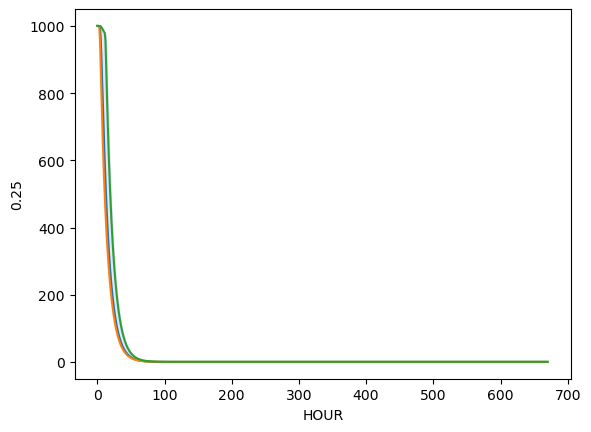

In [270]:
import numpy as np
import seaborn as sns

# Calculate the median, 25th percentile, and 75th percentile
median_parasite_density = df_100_patients_wide_02.median(axis=1)
perc_25_parasite_density = df_100_patients_wide_02.quantile(0.25,axis=1)
perc_75_parasite_density = df_100_patients_wide_02.quantile(0.75,axis=1)

plot = sns.lineplot(x=df_100_patients['HOUR'],y=median_parasite_density)
plot = sns.lineplot(x=df_100_patients['HOUR'],y=perc_25_parasite_density)
plot = sns.lineplot(x=df_100_patients['HOUR'],y=perc_75_parasite_density)

plt.fill_between(np.arange(672), perc_25_parasite_density, perc_75_parasite_density, color='blue', alpha=0.1)
